In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('../optimization_results.csv')
df.head()

,Problem ID,Function ID,Instance ID,Algorithm,Best Solution (X),Best Function Value (F)
0,bbob_f001_i01_d20,1,1,PSO,"[0.25271295628667456, -1.1567240917649382, -0....",79.480001
1,bbob_f001_i01_d20,1,1,CMAES,"[0.25279997234924423, -1.1567999568237237, -0....",79.480000
2,bbob_f001_i01_d20,1,1,DE,"[0.23997986691433615, -1.173100748697348, -0.7...",79.493205
3,bbob_f002_i01_d20,2,1,PSO,"[1.245117359885666, 0.4493633709872876, 3.5584...",-209.874514
4,bbob_f002_i01_d20,2,1,CMAES,"[1.1139023376322843, 0.13834133513122016, 3.72...",-209.395569


In [32]:
function_classes = [1, 1, 1, 1, 1,
                    2, 2, 2, 2,
                    3, 3, 3, 3, 3,
                    4, 4, 4, 4, 4,
                    5, 5, 5, 5, 5]

In [33]:
df['Class ID'] = df.apply(lambda row: function_classes[row['Function ID']-1], axis=1)
df

,Problem ID,Function ID,Instance ID,Algorithm,Best Solution (X),Best Function Value (F),Class ID
0,bbob_f001_i01_d20,1,1,PSO,"[0.25271295628667456, -1.1567240917649382, -0....",79.480001,1
1,bbob_f001_i01_d20,1,1,CMAES,"[0.25279997234924423, -1.1567999568237237, -0....",79.480000,1
2,bbob_f001_i01_d20,1,1,DE,"[0.23997986691433615, -1.173100748697348, -0.7...",79.493205,1
3,bbob_f002_i01_d20,2,1,PSO,"[1.245117359885666, 0.4493633709872876, 3.5584...",-209.874514,1
4,bbob_f002_i01_d20,2,1,CMAES,"[1.1139023376322843, 0.13834133513122016, 3.72...",-209.395569,1
...,...,...,...,...,...,...,...
67,bbob_f023_i01_d20,23,1,CMAES,"[-4.108511474176915, 4.4983144610940755, 0.134...",9.270731,5
68,bbob_f023_i01_d20,23,1,DE,"[-2.590806810409244, -4.458863396760001, -0.11...",9.926722,5
69,bbob_f024_i01_d20,24,1,PSO,"[-1.4582223757040857, -1.1014402220564579, 0.6...",232.462826,5
70,bbob_f024_i01_d20,24,1,CMAES,"[0.22003277724223658, 1.6179215922279742, -0.5...",147.881916,5


In [39]:
without_big = df[df['Best Function Value (F)']<20000]

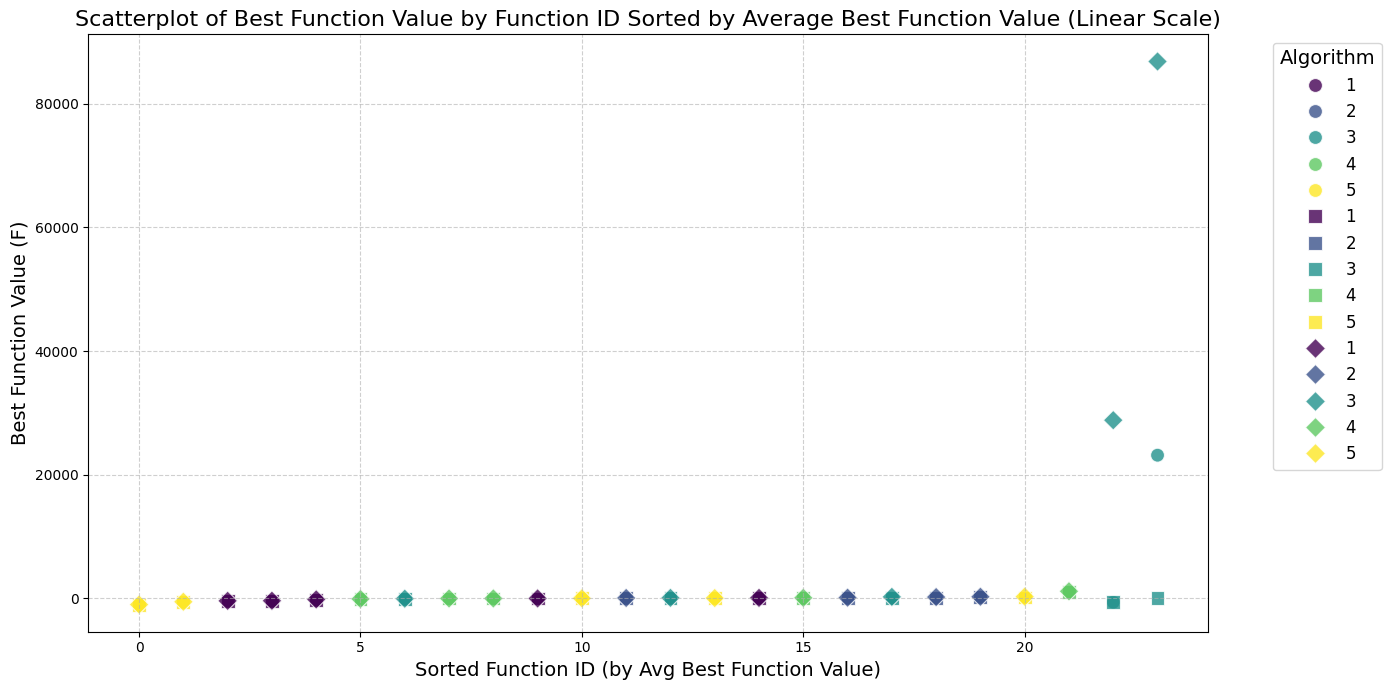

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ensure data types are correct
df['Function ID'] = df['Function ID'].astype(int)
df['Class ID'] = df['Class ID'].astype(int)

# Compute mean Best Function Value (F) for each Function ID
function_avg = df.groupby('Function ID')['Best Function Value (F)'].mean().reset_index()
function_avg = function_avg.sort_values('Best Function Value (F)')


# Map the sorted Function IDs back to the original DataFrame
sorted_function_order = {fid: i for i, fid in enumerate(function_avg['Function ID'])}
df['Sorted Function ID'] = df['Function ID'].map(sorted_function_order)

# Define marker styles for each algorithm
markers = ['o', 's', 'D', '^', 'v']  # Customize marker styles
unique_algorithms = df['Algorithm'].unique()
marker_map = {algorithm: markers[i % len(markers)] for i, algorithm in enumerate(unique_algorithms)}

# Create the scatterplot
plt.figure(figsize=(14, 7))
for algorithm in unique_algorithms:
    subset = df[df['Algorithm'] == algorithm]
    sns.scatterplot(
        data=subset,
        x='Sorted Function ID',
        y='Best Function Value (F)',
        hue='Class ID',
        palette='viridis',
        alpha=0.8,
        s=100,  # Size of the points
        marker=marker_map[algorithm],
        # label=f'Algorithm: {algorithm}'
    )

# Customize the plot
plt.title('Scatterplot of Best Function Value by Function ID Sorted by Average Best Function Value (Linear Scale)', fontsize=16)
plt.xlabel('Sorted Function ID (by Avg Best Function Value)', fontsize=14)
plt.ylabel('Best Function Value (F)', fontsize=14)
plt.legend(title='Algorithm', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/d7/2wv7xtw12_x86l1n47d5p8sm0000gn/T/ipykernel_61351/690678685.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sorted Function ID'] = df_filtered['Function ID'].map(sorted_function_order)


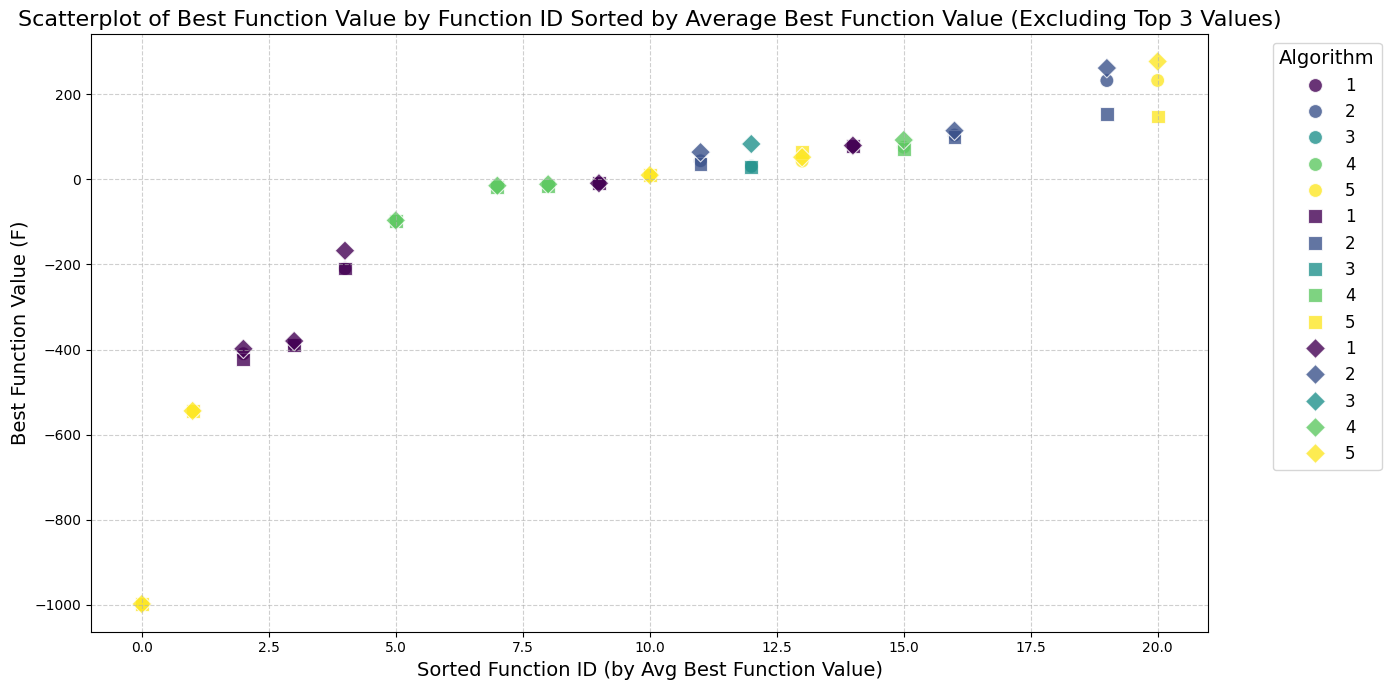

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data types are correct
df['Function ID'] = df['Function ID'].astype(int)
df['Class ID'] = df['Class ID'].astype(int)

# Compute mean Best Function Value (F) for each Function ID
function_avg = df.groupby('Function ID')['Best Function Value (F)'].mean().reset_index()
function_avg = function_avg.sort_values('Best Function Value (F)')

# Remove the three largest Best Function Value (F)
top_3_values = function_avg['Best Function Value (F)'].nlargest(3)
filtered_function_ids = function_avg[~function_avg['Best Function Value (F)'].isin(top_3_values)]['Function ID']

# Filter the original DataFrame
df_filtered = df[df['Function ID'].isin(filtered_function_ids)]

# Map the sorted Function IDs back to the original DataFrame
sorted_function_order = {fid: i for i, fid in enumerate(function_avg['Function ID']) if fid not in top_3_values}
df_filtered['Sorted Function ID'] = df_filtered['Function ID'].map(sorted_function_order)

# Define marker styles for each algorithm
markers = ['o', 's', 'D']  # Customize marker styles
unique_algorithms = df_filtered['Algorithm'].unique()
marker_map = {algorithm: markers[i % len(markers)] for i, algorithm in enumerate(unique_algorithms)}

# Create the scatterplot
plt.figure(figsize=(14, 7))
for algorithm in unique_algorithms:
    subset = df_filtered[df_filtered['Algorithm'] == algorithm]
    sns.scatterplot(
        data=subset,
        x='Sorted Function ID',
        y='Best Function Value (F)',
        hue='Class ID',
        palette='viridis',
        alpha=0.8,
        s=100,  # Size of the points
        marker=marker_map[algorithm],
        # label=f'Algorithm: {algorithm}'
    )

# Customize the plot
plt.title('Scatterplot of Best Function Value by Function ID Sorted by Average Best Function Value (Excluding Top 3 Values)', fontsize=16)
plt.xlabel('Sorted Function ID (by Avg Best Function Value)', fontsize=14)
plt.ylabel('Best Function Value (F)', fontsize=14)
plt.legend(title='Algorithm', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()
